In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

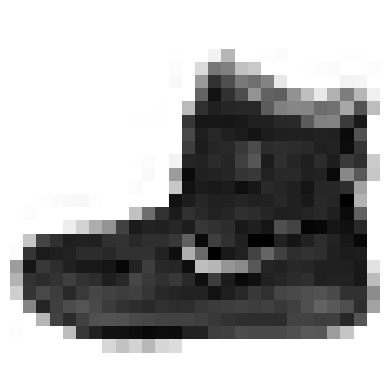

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
y_train[0]

9

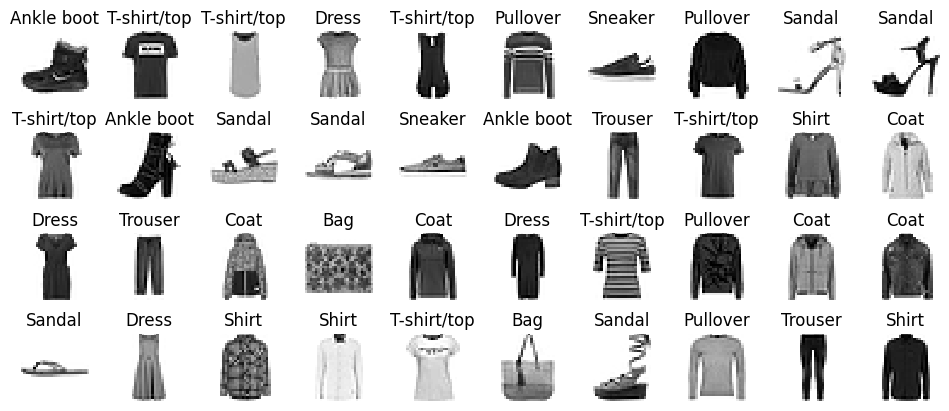

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index+1)
    plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_train[index]])

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

# Tensorflow Sequential API

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation = 'relu'))
model.add(tf.keras.layers.Dense(100, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
        tf.keras.layers.Input(shape = [28, 28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(300, activation = 'relu'),
        tf.keras.layers.Dense(100, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
])

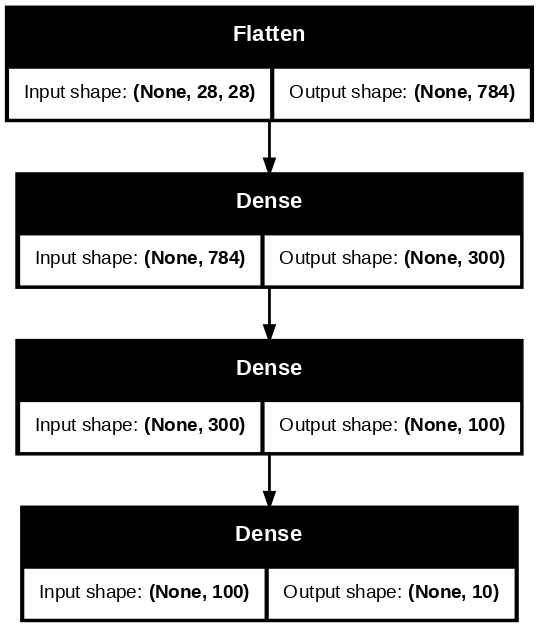

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=100)

In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer('dense') is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.0531975 ,  0.0118259 ,  0.01580966, ...,  0.04194545,
         0.04634201,  0.05611445],
       [ 0.00332418,  0.04256906,  0.00226644, ..., -0.02045998,
        -0.03966064, -0.05207997],
       [-0.03976041, -0.014679  , -0.0578118 , ...,  0.01860997,
        -0.00999406,  0.05964917],
       ...,
       [ 0.06201702,  0.01044308, -0.0493168 , ...,  0.03004684,
        -0.02488617,  0.06544133],
       [-0.03506793, -0.00429936,  0.04608577, ..., -0.0054198 ,
        -0.01933941, -0.04809775],
       [ 0.04097857, -0.04629596, -0.06076891, ...,  0.05133493,
        -0.00514966,  0.06781511]], dtype=float32)

In [ ]:
model.layers[1].get_weights()[0]

array([[ 0.0531975 ,  0.0118259 ,  0.01580966, ...,  0.04194545,
         0.04634201,  0.05611445],
       [ 0.00332418,  0.04256906,  0.00226644, ..., -0.02045998,
        -0.03966064, -0.05207997],
       [-0.03976041, -0.014679  , -0.0578118 , ...,  0.01860997,
        -0.00999406,  0.05964917],
       ...,
       [ 0.06201702,  0.01044308, -0.0493168 , ...,  0.03004684,
        -0.02488617,  0.06544133],
       [-0.03506793, -0.00429936,  0.04608577, ..., -0.0054198 ,
        -0.01933941, -0.04809775],
       [ 0.04097857, -0.04629596, -0.06076891, ...,  0.05133493,
        -0.00514966,  0.06781511]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [ ]:
model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = [tf.keras.metrics.sparse_categorical_accuracy]
)

In [ ]:
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
import numpy as np

np.argmax([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
          axis=1)

array([0, 5, 1, 0])

In [ ]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = [X_valid, y_valid])

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.9785 - sparse_categorical_accuracy: 0.6883 - val_loss: 0.5043 - val_sparse_categorical_accuracy: 0.8274
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.5075 - sparse_categorical_accuracy: 0.8236 - val_loss: 0.4552 - val_sparse_categorical_accuracy: 0.8390
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.4559 - sparse_categorical_accuracy: 0.8413 - val_loss: 0.4327 - val_sparse_categorical_accuracy: 0.8436
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.4257 - sparse_categorical_accuracy: 0.8515 - val_loss: 0.4165 - val_sparse_categorical_accuracy: 0.8498
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4034 - sparse_categorical_accuracy: 0.8586 - val_loss: 0.4035 - val_sparse_categorical_accuracy: 0.8522
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3856 - sparse_categorical_accuracy: 0.8645 - val_loss: 0.3950 - val_sparse_categorical_accurac

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history

{'loss': [0.7099806070327759,
  0.48884645104408264,
  0.4450007379055023,
  0.41745835542678833,
  0.3965604901313782,
  0.37990668416023254,
  0.3658576011657715,
  0.3538232743740082,
  0.34305351972579956,
  0.333125501871109,
  0.3240445554256439,
  0.3156677186489105,
  0.3078998923301697,
  0.3006609082221985,
  0.2938195765018463,
  0.2873910069465637,
  0.28138235211372375,
  0.2756797969341278,
  0.2701144814491272,
  0.2648404836654663,
  0.2597883641719818,
  0.2549186646938324,
  0.2501525282859802,
  0.24572564661502838,
  0.24127008020877838,
  0.23710182309150696,
  0.23290874063968658,
  0.22896137833595276,
  0.22465994954109192,
  0.22062277793884277],
 'sparse_categorical_accuracy': [0.7651636600494385,
  0.8291817903518677,
  0.8442000150680542,
  0.8532181978225708,
  0.8602727055549622,
  0.8661090731620789,
  0.8711454272270203,
  0.8747454285621643,
  0.8782727122306824,
  0.8814181685447693,
  0.8845454454421997,
  0.8873817920684814,
  0.8903999924659729,
  0

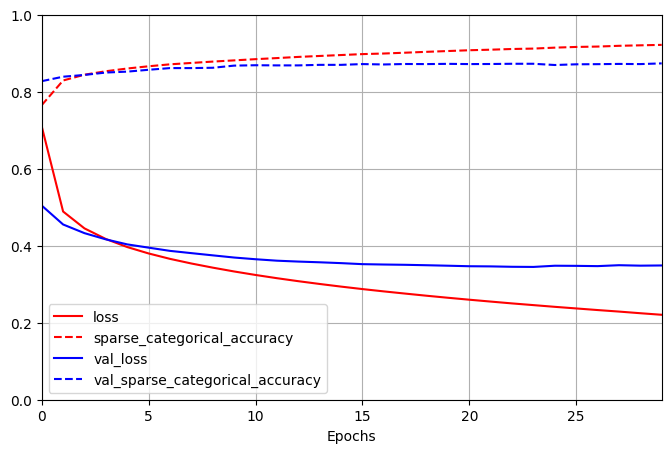

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize = (8, 5), xlim = [0, 29], ylim = [0, 1],
                                   grid = True, xlabel='Epochs',
                                   style = ['r-', 'r--', 'b-', 'b--'],
                                   label = True)
plt.legend()
plt.show()

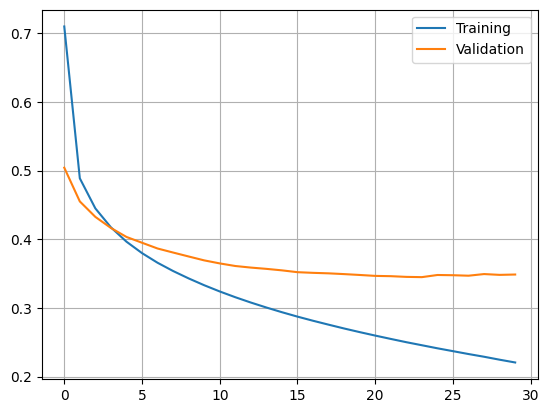

In [ ]:
plt.plot(history.history['loss'], label = 'Training')
plt.plot(history.history['val_loss'], label = 'Validation')
plt.legend()
plt.grid()
plt.show()

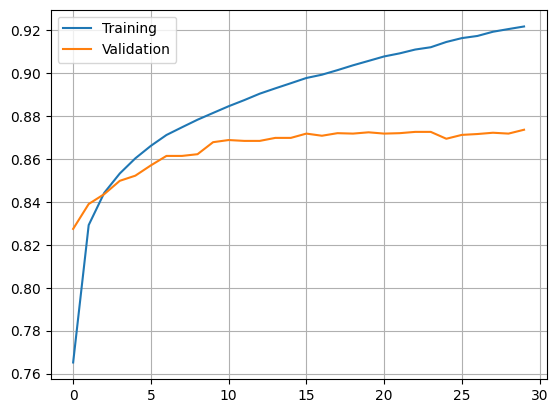

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'], label = 'Training')
plt.plot(history.history['val_sparse_categorical_accuracy'], label = 'Validation')
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3657 - sparse_categorical_accuracy: 0.8762


[0.36707669496536255, 0.8751000165939331]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.16, 0.  , 0.02, 0.  , 0.82],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
class_names[5]

'Sandal'

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

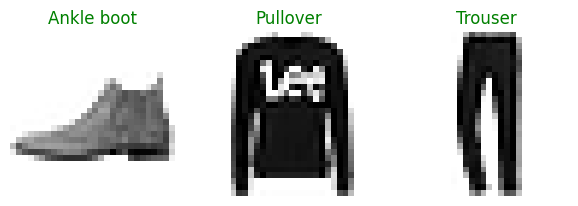

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
  plt.subplot(1, 3, index + 1)
  plt.imshow(image, cmap='binary', interpolation = 'nearest')
  plt.axis('off')
  plt.title(class_names[y_new[index]], fontsize=12,
            color = 'g' if y_pred[index] == y_new[index] else 'r')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

norm_layer = tf.keras.layers.Normalization()
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = X_train.shape[1:]),
    norm_layer,
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')
])

norm_layer.adapt(X_train)
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(),
              metrics = ['RootMeanSquaredError'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - RootMeanSquaredError: 1.1099 - loss: 1.3075 - val_RootMeanSquaredError: 0.6515 - val_loss: 0.4244
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - RootMeanSquaredError: 0.6395 - loss: 0.4095 - val_RootMeanSquaredError: 0.9504 - val_loss: 0.9032
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6062 - loss: 0.3678 - val_RootMeanSquaredError: 0.9837 - val_loss: 0.9677
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5882 - loss: 0.3462 - val_RootMeanSquaredError: 0.7441 - val_loss: 0.5537
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5767 - loss: 0.3328 - val_RootMeanSquaredError: 0.9697 - val_loss: 0.9403
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5664 - loss: 0.3209 - val_RootMeanSquaredError: 1.0726 - val_loss: 1.1504
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.5620 - los

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,822 (65.72 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 11,204 (43.77 KB)

In [ ]:
model.predict(X_test[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


array([[0.49992108]], dtype=float32)

# Functional API

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation = 'relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation = 'relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape = [8])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs = [input_], outputs = [output])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 8)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 8)              │             17 │ input_layer[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 30)             │            270 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 30)             │            930 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 38)             │              0 │ normalization[0][0],   │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             39 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

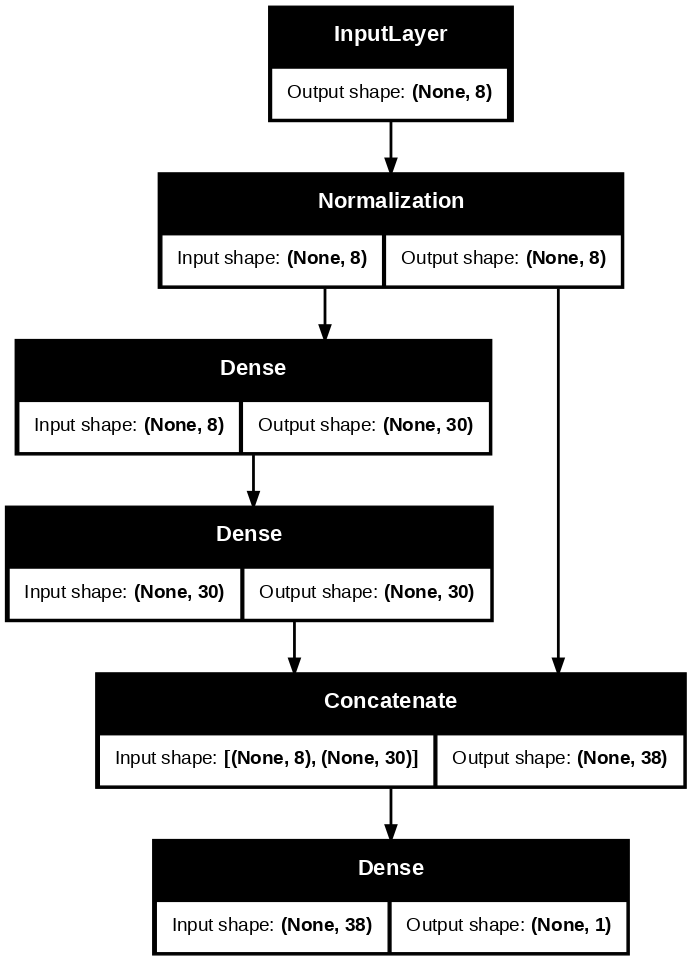

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi = 100)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(loss = 'mse', optimizer = optimizer, metrics = ['RootMeanSquaredError'])
model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - RootMeanSquaredError: 211.0738 - loss: 59071.5508 - val_RootMeanSquaredError: 7.3337 - val_loss: 53.7827
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - RootMeanSquaredError: 1.2548 - loss: 1.5900 - val_RootMeanSquaredError: 6.7131 - val_loss: 45.0651
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 1.1551 - loss: 1.3483 - val_RootMeanSquaredError: 5.9808 - val_loss: 35.7706
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 1.1132 - loss: 1.2504 - val_RootMeanSquaredError: 5.2025 - val_loss: 27.0659
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 1.0629 - loss: 1.1370 - val_RootMeanSquaredError: 4.4073 - val_loss: 19.4241
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 1.0134 - loss: 1.0314 - val_RootMeanSquaredError: 3.6052 - val_loss: 12.9976
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.9838 - lo

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
input_wide = tf.keras.layers.Input(shape = [5])
input_deep = tf.keras.layers.Input(shape = [6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation = 'relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs = [input_wide, input_deep], outputs = [output])

In [ ]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))

mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - RootMeanSquaredError: 1.8645 - loss: 3.6261 - val_RootMeanSquaredError: 1.2187 - val_loss: 1.4852
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 0.8057 - loss: 0.6501 - val_RootMeanSquaredError: 1.2095 - val_loss: 1.4628
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7343 - loss: 0.5396 - val_RootMeanSquaredError: 0.6948 - val_loss: 0.4827
Epoch 4/20


KeyboardInterrupt: 

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 6)              │             13 │ input_layer_1[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer (InputLayer)  │ (None, 5)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 30)             │            210 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 5)              │             11 │ input_layer[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 30)             │            930 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 35)             │              0 │ normalization[0][0],   │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             36 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,554 (13.89 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

 Optimizer params: 2,354 (9.20 KB)

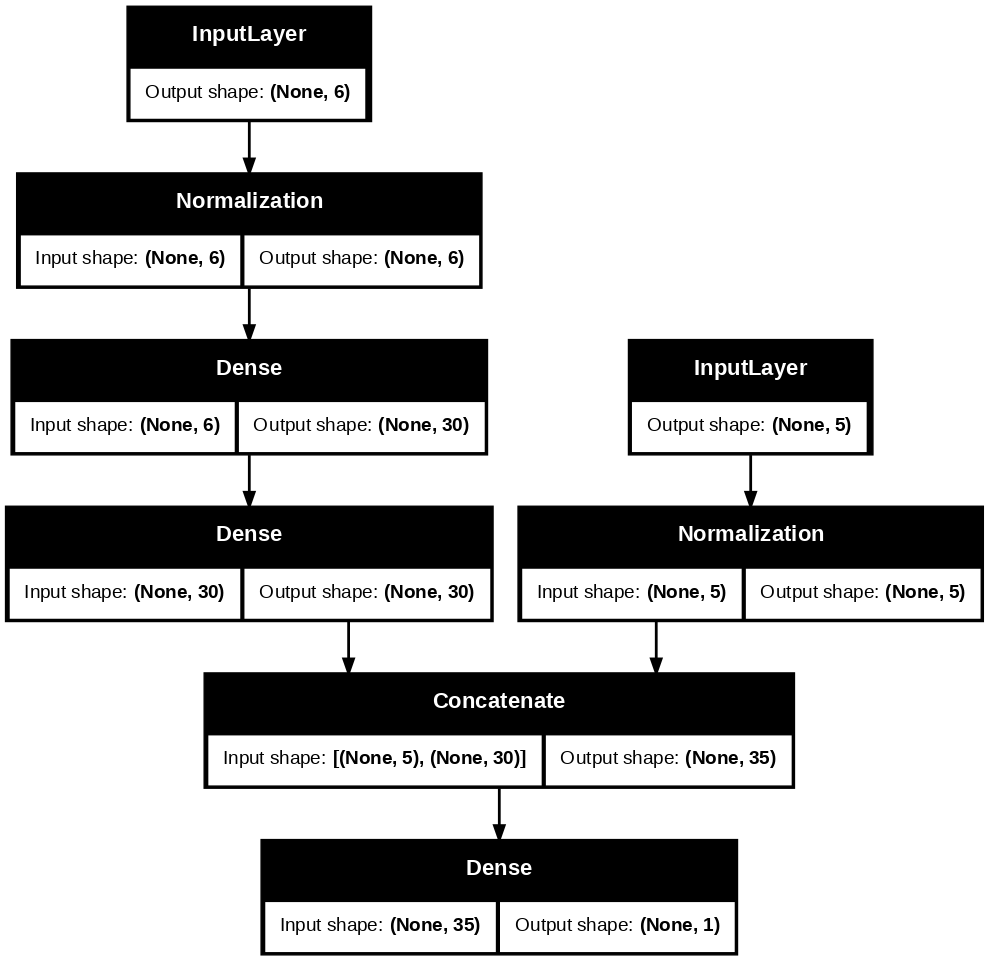

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=100)

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
input_wide = tf.keras.layers.Input(shape = [5])
input_deep = tf.keras.layers.Input(shape = [6])
norm_wide_layer = tf.keras.layers.Normalization()
norm_deep_layer = tf.keras.layers.Normalization()

norm_wide = norm_wide_layer(input_wide)
norm_deep = norm_deep_layer(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])

output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

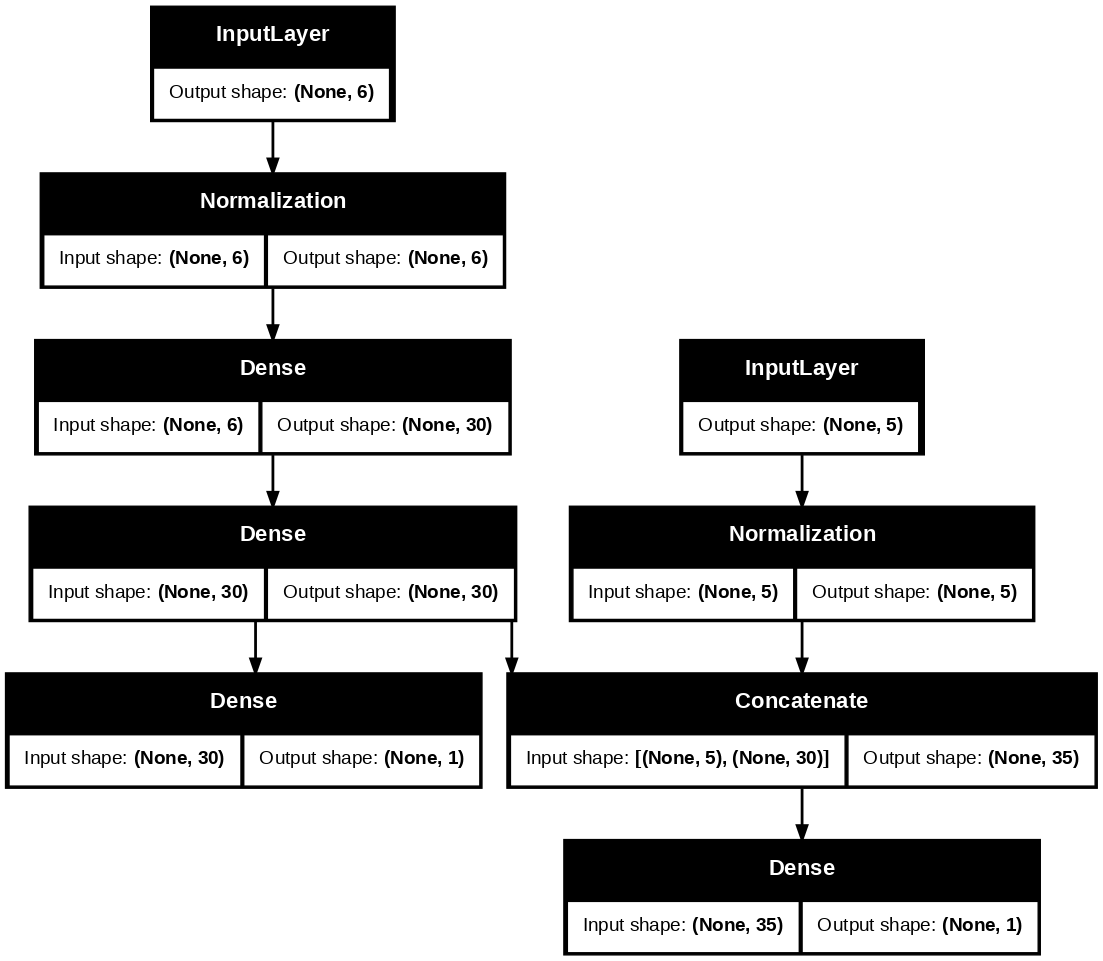

In [ ]:
tf.keras.utils.plot_model(model, dpi=100, show_shapes=True)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=('mse', 'mse'),
    loss_weights=(0.9, 0.1),
    metrics=["RootMeanSquaredError", "RootMeanSquaredError"]
    )

In [ ]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - dense_2_RootMeanSquaredError: 126.8599 - dense_2_loss: 21262.1543 - dense_3_RootMeanSquaredError: 55.6846 - dense_3_loss: 3440.8906 - loss: 19480.0391 - val_dense_2_RootMeanSquaredError: 3.7231 - val_dense_2_loss: 13.8593 - val_dense_3_RootMeanSquaredError: 2.2329 - val_dense_3_loss: 4.9843 - val_loss: 12.9738
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - dense_2_RootMeanSquaredError: 3.3766 - dense_2_loss: 11.4048 - dense_3_RootMeanSquaredError: 1.7281 - dense_3_loss: 2.9924 - loss: 10.5636 - val_dense_2_RootMeanSquaredError: 3.6012 - val_dense_2_loss: 12.9666 - val_dense_3_RootMeanSquaredError: 1.8661 - val_dense_3_loss: 3.4816 - val_loss: 12.0197
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - dense_2_RootMeanSquaredError: 3.2173 - dense_2_loss: 10.3551 - dense_3_RootMeanSquaredError: 1.5200 - dense_3_loss: 2.3126 - loss: 9.5509 - val_dense_2_RootMeanSquaredError: 3.5312 - val_dense_2_loss: 12.4675 - val_dense_3_Ro

14/02/2025

# Using the Subclassing API to Build  Dynamic Models

In [ ]:
import tensorflow as tf

In [ ]:
@tf.keras.utils.register_keras_serializable()
class WideAndDeepModel(tf.keras.Model):
  def __init__(self, units = 30, activation = 'relu', **kwargs):
    super().__init__(**kwargs)
    self.norm_layer_wide = tf.keras.layers.Normalization()
    self.norm_layer_deep = tf.keras.layers.Normalization()
    self.hidden1 = tf.keras.layers.Dense(units, activation = activation)
    self.hidden2 = tf.keras.layers.Dense(units, activation = activation)
    self.main_output = tf.keras.layers.Dense(1)
    self.aux_output = tf.keras.layers.Dense(1)

  def call(self, inputs):
    input_wide, input_deep = inputs
    norm_wide = self.norm_layer_wide(input_wide)
    norm_deep = self.norm_layer_deep(input_deep)
    hidden1 = self.hidden1(norm_deep)
    hidden2 = self.hidden2(hidden1)
    concat = tf.keras.layers.concatenate([norm_wide, hidden2])
    output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return output, aux_output


tf.random.set_seed(42)
model = WideAndDeepModel(30, activation='relu', name='my_cool_model')



In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=['RootMeanSquaredError', 'RootMeanSquaredError'])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - RootMeanSquaredError: 1.7009 - RootMeanSquaredError_1: 1.8627 - loss: 3.0881 - mse_loss: 3.5677 - val_RootMeanSquaredError: 1.6444 - val_RootMeanSquaredError_1: 1.4526 - val_loss: 2.6447 - val_mse_loss: 2.1093
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.7697 - RootMeanSquaredError_1: 0.9539 - loss: 0.6246 - mse_loss: 0.9110 - val_RootMeanSquaredError: 0.8614 - val_RootMeanSquaredError_1: 0.8584 - val_loss: 0.7415 - val_mse_loss: 0.7367
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.6919 - RootMeanSquaredError_1: 0.8209 - loss: 0.4985 - mse_loss: 0.6742 - val_RootMeanSquaredError: 0.6681 - val_RootMeanSquaredError_1: 0.7534 - val_loss: 0.4584 - val_mse_loss: 0.5675
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6606 - RootMeanSquaredError_1: 0.7579 - loss: 0.4505 - mse_loss: 0.5746 - val_RootMeanSquaredError: 0.6390 - val_RootMeanSquaredE

In [ ]:
import shutil

shutil.rmtree('my_keras_model.keras', ignore_errors=True)

In [ ]:
model.save('my_keras_model.keras')

In [ ]:
model = tf.keras.models.load_model('/content/my_keras_model.keras')
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


In [ ]:
y_pred_main

array([[0.45864332],
       [1.3877593 ],
       [3.377224  ]], dtype=float32)

# Using callbacks

In [ ]:
import shutil

shutil.rmtree('my_checkpoints', ignore_errors=True)

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_checkpoints.weights.h5', save_best_only=True,
                                                   save_weights_only = True, save_freq='epoch')
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb]
)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - RootMeanSquaredError: 0.6028 - RootMeanSquaredError_1: 0.6671 - loss: 0.3716 - mse_loss: 0.4451 - val_RootMeanSquaredError: 1.2508 - val_RootMeanSquaredError_1: 1.5341 - val_loss: 1.6433 - val_mse_loss: 2.3523
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.6002 - RootMeanSquaredError_1: 0.6636 - loss: 0.3684 - mse_loss: 0.4404 - val_RootMeanSquaredError: 1.3343 - val_RootMeanSquaredError_1: 1.7274 - val_loss: 1.9007 - val_mse_loss: 2.9826
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - RootMeanSquaredError: 0.5976 - RootMeanSquaredError_1: 0.6587 - loss: 0.3649 - mse_loss: 0.4341 - val_RootMeanSquaredError: 1.0094 - val_RootMeanSquaredError_1: 1.0844 - val_loss: 1.0345 - val_mse_loss: 1.1755
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.5938 - RootMeanSquaredError_1: 0.6512 - loss: 0.3598 - mse_loss: 0.4242 - val_RootMeanSquaredError: 1.0025 - val_RootMeanSquaredE

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 10,
                                                     restore_best_weights = True)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5799 - RootMeanSquaredError_1: 0.6314 - loss: 0.3425 - mse_loss: 0.3987 - val_RootMeanSquaredError: 1.0656 - val_RootMeanSquaredError_1: 1.3027 - val_loss: 1.1917 - val_mse_loss: 1.6962
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5799 - RootMeanSquaredError_1: 0.6320 - loss: 0.3426 - mse_loss: 0.3995 - val_RootMeanSquaredError: 0.8341 - val_RootMeanSquaredError_1: 1.1514 - val_loss: 0.7587 - val_mse_loss: 1.3251
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5756 - RootMeanSquaredError_1: 0.6262 - loss: 0.3375 - mse_loss: 0.3921 - val_RootMeanSquaredError: 0.6199 - val_RootMeanSquaredError_1: 0.7377 - val_loss: 0.4002 - val_mse_loss: 0.5440
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5734 - RootMeanSquaredError_1: 0.6225 - loss: 0.3347 - mse_loss: 0.3876 - val_RootMeanSquaredError: 0.6452 - val_RootMeanSquaredEr

17/02/2025

In [ ]:
import tensorflow as tf

In [ ]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    ratio = logs['val_loss'] / logs['loss']
    print(f'Epoch={epoch}, val/train={ratio:.2f}')

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0
)

NameError: name 'PrintValTrainRatioCallback' is not defined

In [ ]:
# sigmoid, tanh, relu, leaky relu, linear, prelu(paramteric relu)
# activation function